In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import arviz as az
import pymc3 as pm 
import seaborn as sns 

sns.set(color_codes=True)
import arviz as az
az.style.use('arviz-darkgrid')


In [2]:
df = pd.read_csv('datasets/ChickWeight.csv')

<Figure size 1500x1000 with 0 Axes>

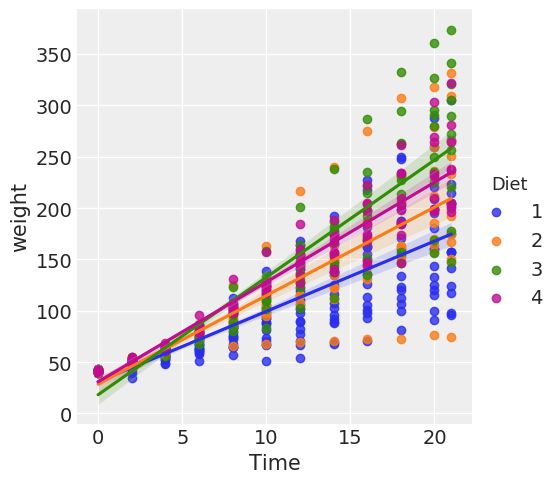

In [3]:
plt.figure(figsize=(15, 10))
sns.lmplot(x='Time', y='weight', hue='Diet', data=df)

In [4]:
df

Unnamed: 0  weight  Time  Chick  Diet
0             1      42     0      1     1
1             2      51     2      1     1
2             3      59     4      1     1
3             4      64     6      1     1
4             5      76     8      1     1
..          ...     ...   ...    ...   ...
573         574     175    14     50     4
574         575     205    16     50     4
575         576     234    18     50     4
576         577     264    20     50     4
577         578     264    21     50     4

[578 rows x 5 columns]

In [5]:
chicks_pivot = df.pivot_table(values="weight", index=['Chick', 'Diet'], columns='Time')
chicks_pivot.head(10)

Time          0     2     4     6     8      10     12     14     16     18  \
Chick Diet                                                                    
1     1     42.0  51.0  59.0  64.0  76.0   93.0  106.0  125.0  149.0  171.0   
2     1     40.0  49.0  58.0  72.0  84.0  103.0  122.0  138.0  162.0  187.0   
3     1     43.0  39.0  55.0  67.0  84.0   99.0  115.0  138.0  163.0  187.0   
4     1     42.0  49.0  56.0  67.0  74.0   87.0  102.0  108.0  136.0  154.0   
5     1     41.0  42.0  48.0  60.0  79.0  106.0  141.0  164.0  197.0  199.0   
6     1     41.0  49.0  59.0  74.0  97.0  124.0  141.0  148.0  155.0  160.0   
7     1     41.0  49.0  57.0  71.0  89.0  112.0  146.0  174.0  218.0  250.0   
8     1     42.0  50.0  61.0  71.0  84.0   93.0  110.0  116.0  126.0  134.0   
9     1     42.0  51.0  59.0  68.0  85.0   96.0   90.0   92.0   93.0  100.0   
10    1     41.0  44.0  52.0  63.0  74.0   81.0   89.0   96.0  101.0  112.0   

Time           20     21  
Chick Diet                
1     1     199.0  205.0  
2     1     209.0  215.0  
3     1     198.0  202.0  
4     1     160.0  157.0  
5     1     220.0  223.0  
6     1     160.0  157.0  
7     1     288.0  305.0  
8     1     125.0    NaN  
9     1     100.0   98.0  
10    1     120.0  124.0

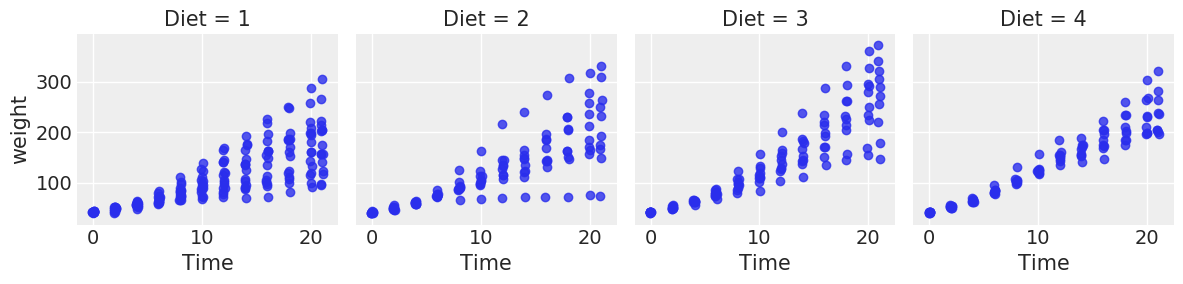

In [6]:
chicks_pivot.isnull().any(axis=1).sum()
chicks_pivot = chicks_pivot.dropna();
chicks = chicks_pivot.stack().reset_index(name='weight')
g = sns.FacetGrid(chicks, col="Diet", margin_titles=True)
g.map(sns.regplot, "Time", "weight",fit_reg=False, x_jitter=.1)

In [7]:
df

Unnamed: 0  weight  Time  Chick  Diet
0             1      42     0      1     1
1             2      51     2      1     1
2             3      59     4      1     1
3             4      64     6      1     1
4             5      76     8      1     1
..          ...     ...   ...    ...   ...
573         574     175    14     50     4
574         575     205    16     50     4
575         576     234    18     50     4
576         577     264    20     50     4
577         578     264    21     50     4

[578 rows x 5 columns]

In [16]:
diet_idx = df.Diet.values
n_diets = len(diet_idx)
with pm.Model() as linear_model:
    sigma = pm.HalfCauchy('eps', 5)
    intercept = pm.Normal('intercept', mu=0, sigma=2)
    weights = pm.Normal('weights', mu=0, sigma=5, shape=n_diets)

    chichken_weight = pm.Normal('weight', mu=weights[diet_idx]*df['Time'].to_numpy() + intercept, sigma=sigma,
                                observed=df['weight'])

    trace = pm.sample(3000, tune=2000, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [weights, intercept, eps]


Sampling 2 chains for 2_000 tune and 3_000 draw iterations (4_000 + 6_000 draws total) took 14 seconds.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb02c97c3d0>],
      dtype=object)

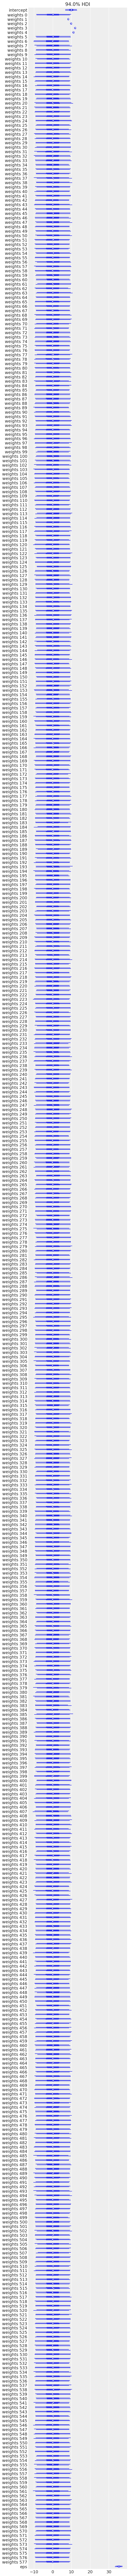

In [18]:
az.plot_forest(trace)

In [46]:
diet_idx = df.Diet.values
n_diets = len(diet_idx)
with pm.Model() as linear_model:
    sigma = pm.HalfCauchy('eps', 5)
    intercept = pm.Normal('intercept', mu=0, sigma=2)
    weight = pm.Normal('weights', mu=0, sigma=5)

    chichken_weight = pm.Normal('weight', mu=weight*df[df['Diet']==1]['Time'].to_numpy() + intercept, sigma=sigma,
                                observed=df[df['Diet']==1]['weight'].to_numpy())

    trace = pm.sample(1000, tune=500, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [weights, intercept, eps]


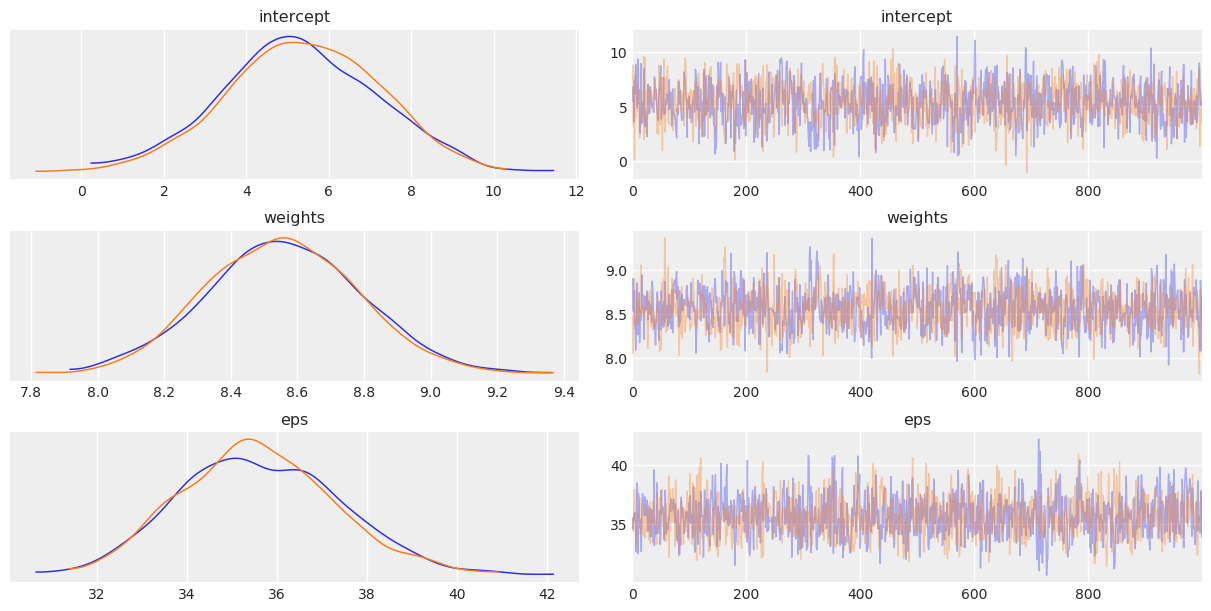

In [47]:
az.plot_trace(trace);
